A classification problem classifying employee retention based on attributes such as number of projects, number of hours worked, satisfaction, whether or not filed complaint, tenure, status, salary, etc.

<h2> Import Libraries </h2>

In [ ]:
# Import print function for compatibility with Python 3
from __future__ import print_function
print('Print function ready to serve.')

#import os
import os

# Import numpy for numerical computing
import numpy as np

#Import pandas for data manipulation
import pandas as pd

#import matplotlib for visualization
from matplotlib import pyplot as plt

#display plots in the notebook
%matplotlib inline

#import seaborn for easier visualization
import seaborn as sns

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Pickle for saving model files
import pickle

In [2]:
os.getcwd()

'/Users/raghav/Desktop/Data Science Specialization Coursera/Project 3 Workbook Bundle'

In [3]:
os.chdir('project_files')
df = pd.read_csv('employee_data.csv')

<h2> Basic Exploration </h2>

In [4]:
# Dataframe dimensions
df.shape

(14249, 10)

In [5]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [6]:
# Column datatypes
df.dtypes[df.dtypes=='object']

department    object
salary        object
status        object
dtype: object

In [7]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


Many missing values in <code>filed_complaint</code> and <code>recently_promoted</code>

In [8]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


<h3> Distribution of Numeric features </h3>

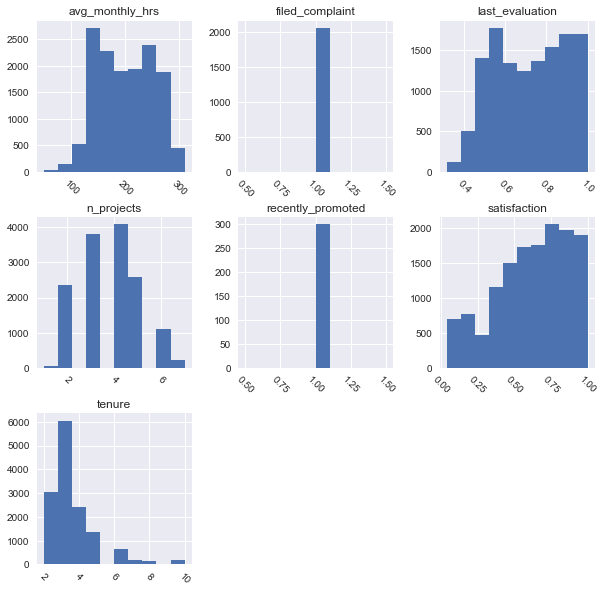

In [9]:
# Plot histogram grid
df.hist(figsize=(10,10),xrot=-45)

# Clear the text "residue"
plt.show()

In [10]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [11]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


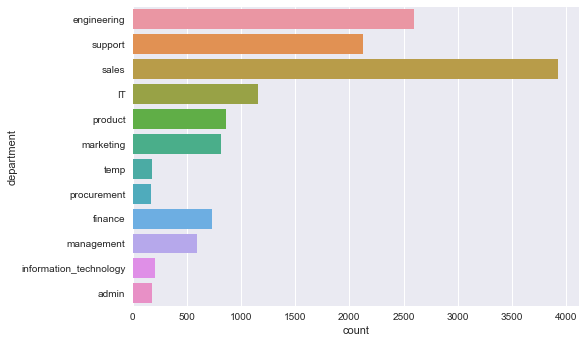

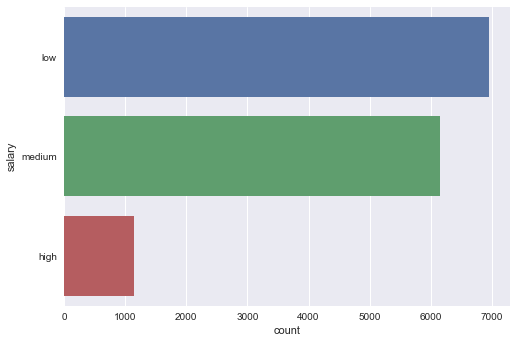

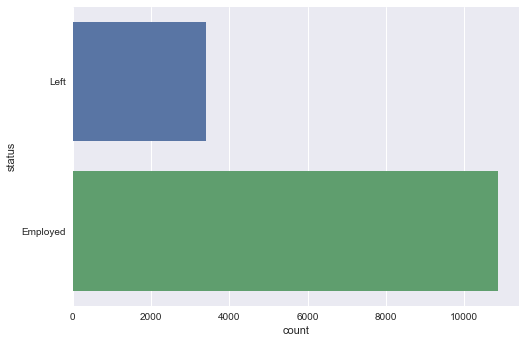

In [12]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

<h2> Segmentations </h2>

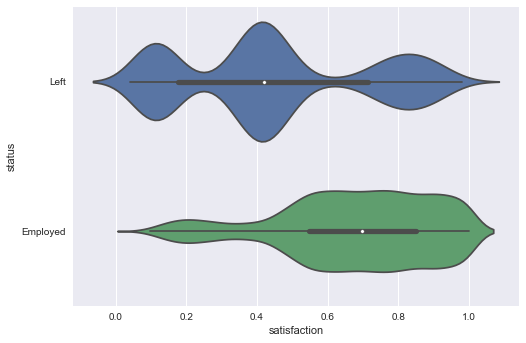

In [13]:
# Segment satisfaction by status and plot distributions
sns.violinplot(x='satisfaction',y='status',data=df)

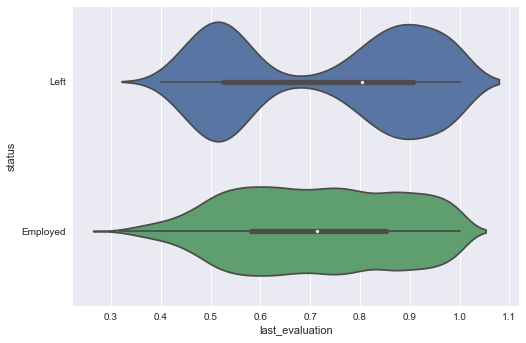

In [14]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(x='last_evaluation',y='status',data=df)

In [15]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


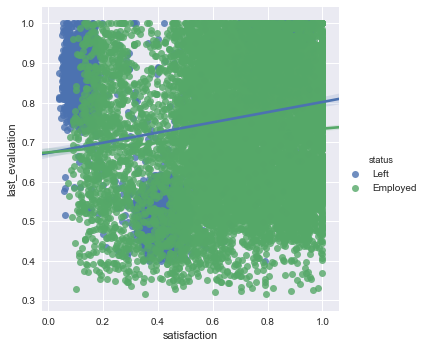

In [16]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df)

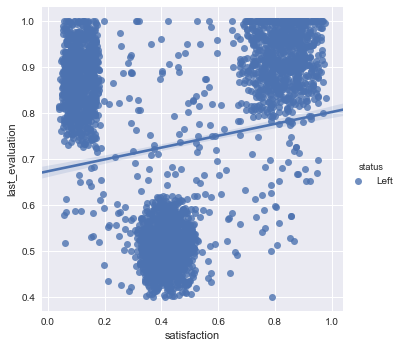

In [17]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'])

<h2> Data cleaning </h2>

In [18]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(14221, 10)


In [19]:
# Unique classes of 'department'
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [20]:
# Drop temporary workers as they don't belong to that department
df = df[df.department != 'temp']
df.shape

(14068, 10)

<h3> Fix Structural Errors </h3>

In [21]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[ nan   1.]
[ nan   1.]


In [22]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)

# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

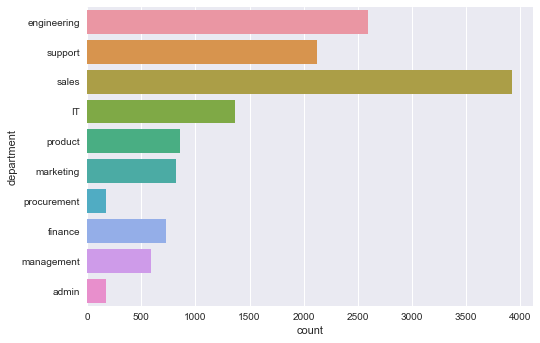

In [23]:
# 'information_technology' should be 'IT'
df.replace('information_technology','IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department',data=df)

<h3> Handle missing data </h3>

In [24]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

Department is a categorical variable that has missing values. So, creating a new class called 'Missing' for department...

In [25]:
# Fill missing values in department with 'Missing'
df['department'] = df.department.fillna('Missing')

Last_evaluation is a continuous value that has missing values. So, creating a new indicator variable called <code>'last_evaluation_missing'</code> that denotes missing values and setting the original missing values to 0 so that algorithms can run properly.

In [26]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df['last_evaluation'].isnull().astype(int)

In [27]:
# Fill missing values in last_evaluation with 0
df['last_evaluation'] = df.last_evaluation.fillna(0)

Again display number of missing values just to confirm...

In [28]:
# Display number of missing values by feature
df.isnull().sum()  

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

Great, now that I am done with data cleaning, let's proceed to feature engineering...

<h2> Feature Engineering </h2>

Let's reproduce the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code> here, just so we have it in front of us.

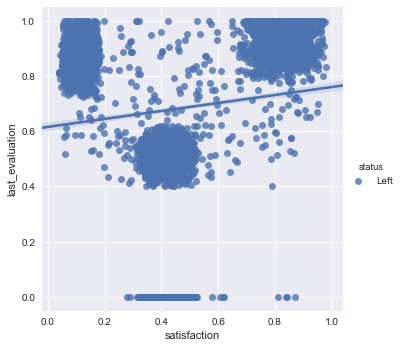

In [30]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'])

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

<br>
**Creating those 3 indicator features.**
* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include <code style="color:steelblue">'last_evaluation_missing' == 0</code> to avoid those originally missing observations that we flagged and filled.

In [31]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation_missing == 0) & (df.last_evaluation < 0.6)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever']= ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

Checking to see if features got created correctly.

In [32]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

**Convert <code style="color:steelblue">'status'</code> into an indicator variable.**
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>

In [33]:
 # Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

**To confirm we did that correctly, display the proportion of people in our dataset who left.**

In [34]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

In [35]:
# Create new dataframe with dummy features for categorical variables
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


<h3> Save to Analytical Base table </h3>

In [36]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

Load the ABT

In [ ]:
# Load analytical base table from Module 2
df = pd.read_csv('analytical_base_table.csv')

Separate X and Y

In [ ]:
# Create separate object for target variable
y = df.status

# Create separate object for input features
X = df.drop('status', axis=1)

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234, stratify=df.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))